# Coordenadas de las ciudades

In [1]:
cities = [
    (1,3), (2,5), (2,7), (4,2), (4,4), 
    (4,7), (4,8), (5,3), (6,1), (6,6), 
    (7,8), (8,2), (8,7), (9,3), (10,7), 
    (11,1), (11,4), (11,6), (12,7), (13,5),
]

# Parámetros iniciales

In [2]:
from agente_viajero import AgenteViajero

av = AgenteViajero(cities, population_size=100, n_generations=100, tournament_size=0.07)

In [9]:
av.train(reprod_functions=[av.inversion_reprod], verbose=False)
df = av.result.copy()
df

,top_cities,top_route,top_dist
0,"[0, 1, 9, 6, 4, 10, 11, 13, 3, 7, 16, 14, 18, ...","[(0, 1), (1, 9), (9, 6), (6, 4), (4, 10), (10,...",85.171823
1,"[0, 1, 9, 6, 4, 10, 11, 13, 3, 7, 16, 14, 18, ...","[(0, 1), (1, 9), (9, 6), (6, 4), (4, 10), (10,...",78.660482
2,"[0, 1, 9, 6, 4, 10, 11, 13, 3, 7, 16, 14, 18, ...","[(0, 1), (1, 9), (9, 6), (6, 4), (4, 10), (10,...",75.952278
3,"[0, 1, 9, 6, 4, 10, 11, 13, 3, 7, 16, 14, 18, ...","[(0, 1), (1, 9), (9, 6), (6, 4), (4, 10), (10,...",74.433224
4,"[0, 1, 9, 6, 4, 10, 19, 15, 12, 18, 17, 14, 16...","[(0, 1), (1, 9), (9, 6), (6, 4), (4, 10), (10,...",71.524229
...,...,...,...
95,"[0, 1, 2, 6, 5, 9, 10, 12, 14, 17, 18, 19, 16,...","[(0, 1), (1, 2), (2, 6), (6, 5), (5, 9), (9, 1...",37.202252
96,"[0, 1, 2, 6, 5, 9, 10, 12, 14, 17, 18, 19, 16,...","[(0, 1), (1, 2), (2, 6), (6, 5), (5, 9), (9, 1...",37.202252
97,"[0, 1, 2, 6, 5, 9, 10, 12, 14, 17, 18, 19, 16,...","[(0, 1), (1, 2), (2, 6), (6, 5), (5, 9), (9, 1...",37.202252
98,"[0, 1, 2, 6, 5, 9, 10, 12, 14, 17, 18, 19, 16,...","[(0, 1), (1, 2), (2, 6), (6, 5), (5, 9), (9, 1...",37.202252


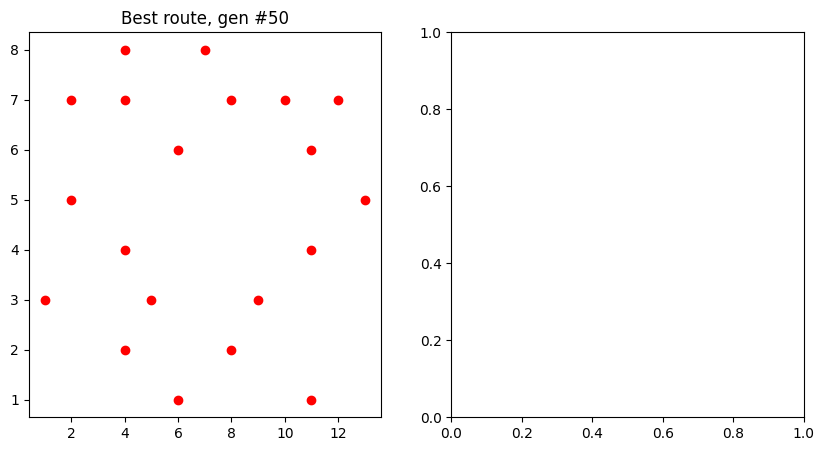

In [63]:
from matplotlib.pyplot import subplots, show

class PlotCities:
    def set_plot_env(self, coord: list) -> None:
        self.fig, self.axes = subplots(nrows=1, ncols=2, figsize=(10, 5))
        self.cit_x, self.cit_y = [*zip(*coord)]

    def plot_cities(self, **kwargs) -> None:
        self.axes[0].scatter(self.cit_x, self.cit_y, **kwargs)
        
    def connectpoints(self, point: tuple, **kwargs) -> None:
        x1, x2 = self.cit_x[point[0]], self.cit_x[point[-1]]
        y1, y2 = self.cit_y[point[0]], self.cit_y[point[-1]]
        self.axes[0].plot([x1, x2],[y1, y2], **kwargs)

    def delete_connection(self, point: tuple, **kwargs) -> None:
        # self.axes[0].lines[0].remove()
        self.axes[0].lines.clear()

    def plot_route(self, route: list, n_gen: int, **kwargs) -> None:
        for city in route:
            self.connectpoints(city, **kwargs)
        self.axes[0].set_title(f'Best route, gen #{n_gen}')
        self.delete_connection('')
        # show()
        # return self.axes[0]

    def animate_route(self, routes: list) -> None:
        for i,x in enumerate(routes):
            if i>0: pass
            

pc = PlotCities()
pc.set_plot_env(cities)
pc.plot_cities(c='red')
a = pc.plot_route(df['top_route'][50], n_gen=50, c='blue')

# Comparando métodos de reproducción

## Enroque

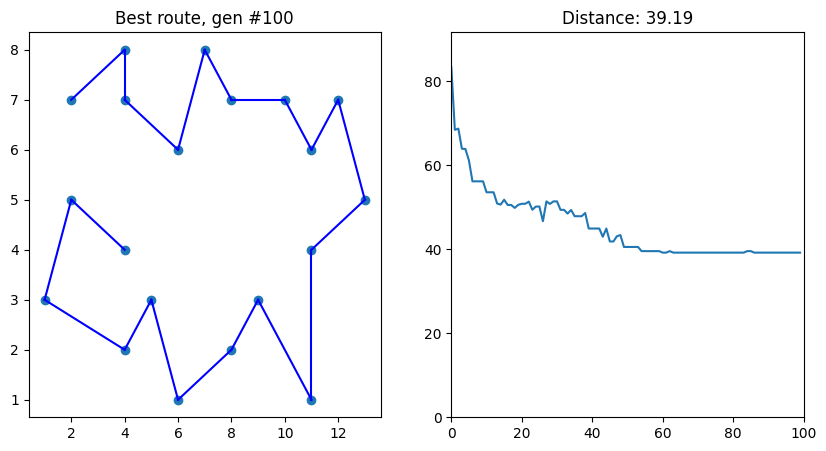

In [3]:
av.train(reprod_functions=[av.castling_reprod], verbose=False)


# Inversión

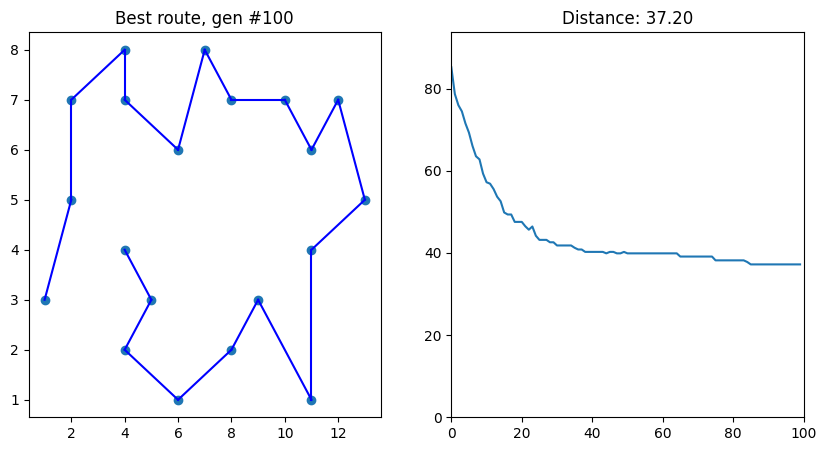

In [5]:
av.train(reprod_functions=[av.inversion_reprod], verbose=False)

## Combinación de ambos

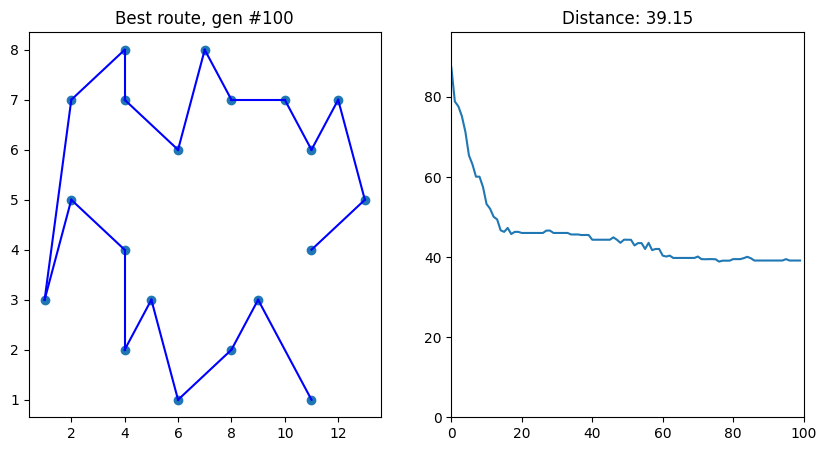

In [5]:
av.train(reprod_functions=[av.castling_reprod, av.inversion_reprod], verbose=False)

# Inversión es mejor para este problema
## (veamos la evolución animada)

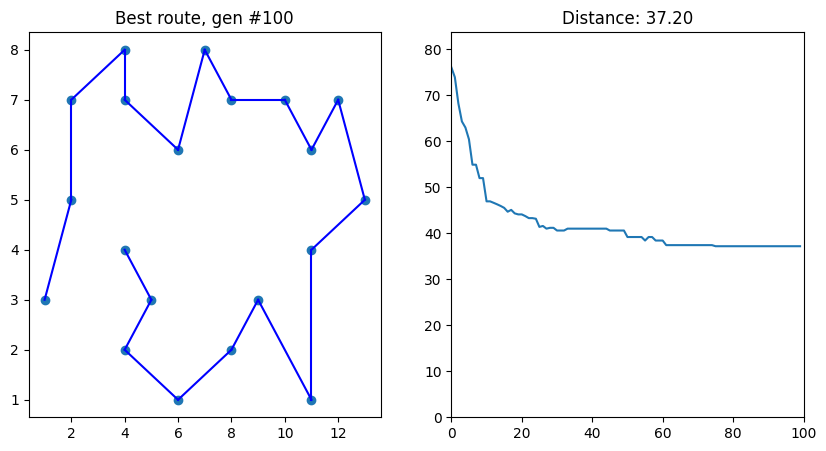

In [7]:
av.train(reprod_functions=[av.inversion_reprod], verbose=True)